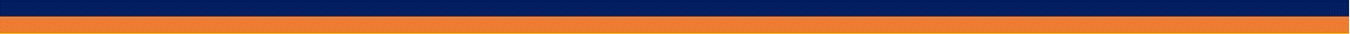

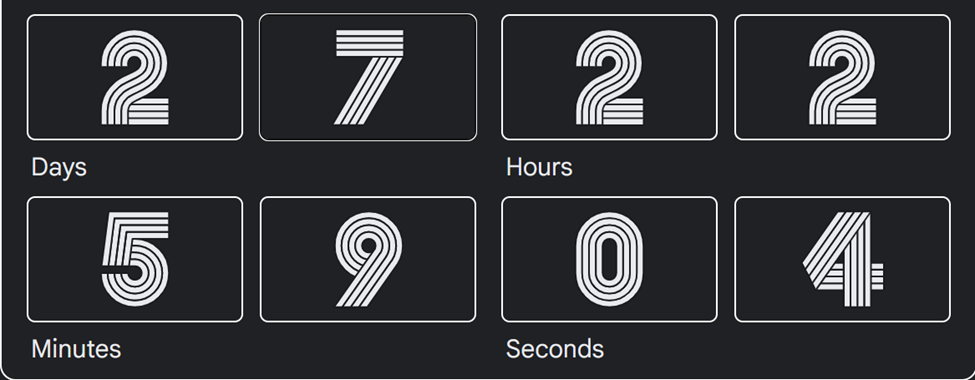

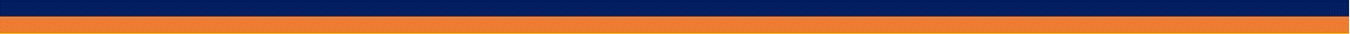


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center> Practice Project Six </center></h1>

<h1><center>Portfolio Optimization with Python</center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford Osumanu </center></h1>



<h1><center>April  2023 </center></h1>


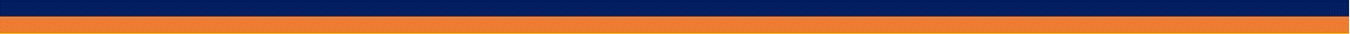

<img src="https://media1.giphy.com/media/B1xUp52rUnrv1Leakw/giphy.gif?cid=ecf05e474uu1n7n5jvml69duzey3lgtcwowq6txw47ktbfpq&rid=giphy.gif&ct=g.gif" width="750" height="500" align="center">

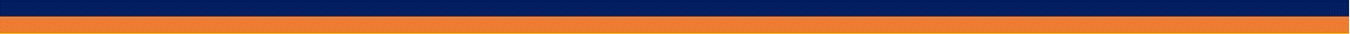

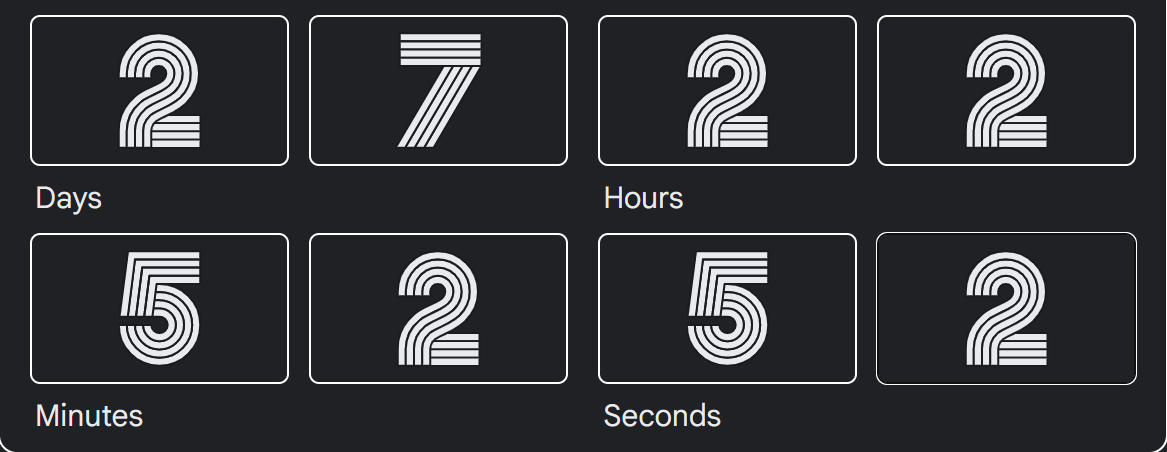

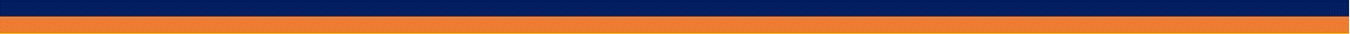

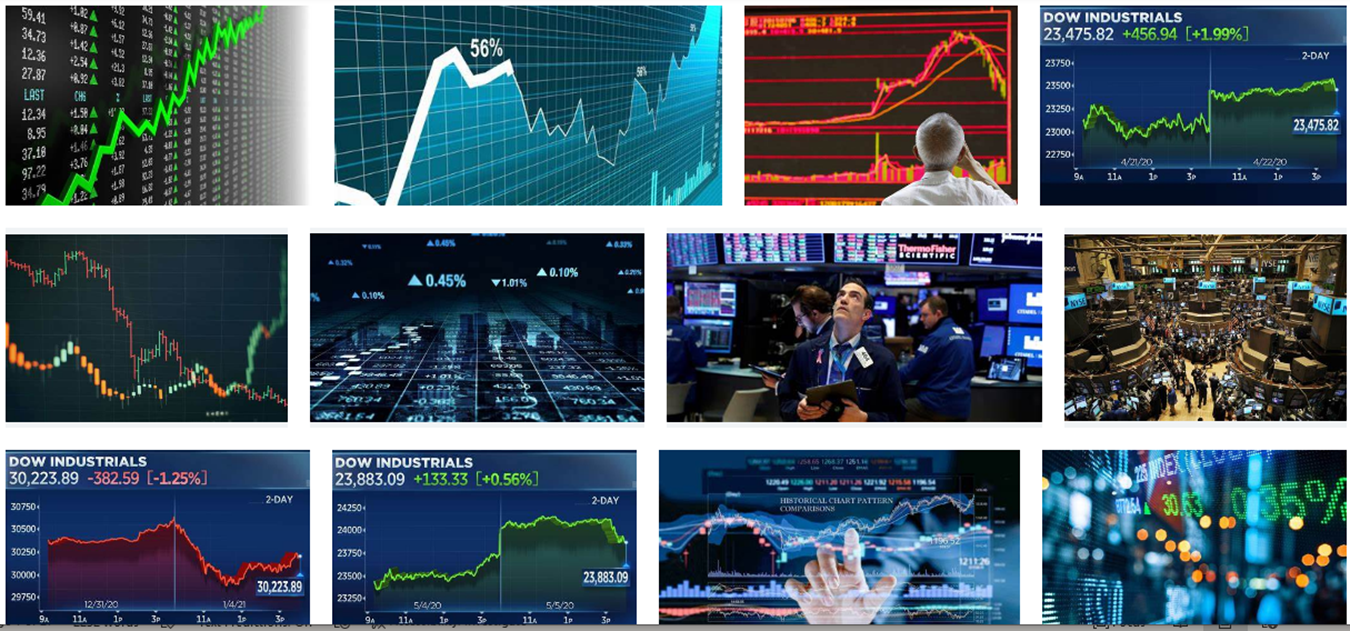

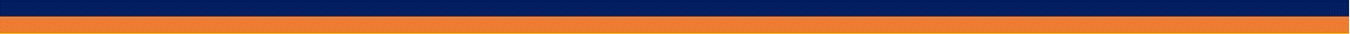

# Python Libraries Installations

### Lets install all the needed Python Liberaries for the entire analysis

image.png

# Import Python Libraries

### Lets import all the needed libraries for our analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import yahoo_fin.stock_info as si
# OR
from yahoo_fin.stock_info import*
import pandas as pd

In [ ]:
import yahoo_fin.stock_info as si
# OR
from yahoo_fin.stock_info import*
import pandas as pd

image.png

# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [ ]:
import yfinance as yahooFinance
import pandas as pd

# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
amzn = yahooFinance.Ticker("AMZN")
amazon = amzn.history(period="5y")
amazon['Date'] = pd.to_datetime(amazon.index).strftime('%m/%d/%y')

goog = yahooFinance.Ticker("GOOG")
google = goog.history(period="5y")
google['Date'] = pd.to_datetime(google.index).strftime('%m/%d/%y')

tsla = yahooFinance.Ticker("TSLA")
tesla = tsla.history(period="5y")
tesla['Date'] = pd.to_datetime(tesla.index).strftime('%m/%d/%y')

meta = yahooFinance.Ticker("META")
facebook = meta.history(period="5y")
facebook['Date'] = pd.to_datetime(facebook.index).strftime('%m/%d/%y')

In [ ]:
dfs = [amazon["Close"], google["Close"], tesla["Close"], facebook["Close"]]
df_combined = pd.concat(dfs, axis=1)
df_combined.columns = ['amazon', 'google', 'tesla', 'facebook']
df_combined.insert(0, 'Date', amazon['Date'])

In [ ]:
df_combined["Date"] = pd.to_datetime(df_combined["Date"], format="%m/%d/%y")
df_combined["Date"] = df_combined["Date"].astype(int)
stocks=df_combined.copy()

In [ ]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-04-16 00:00:00-04:00 to 2023-04-14 00:00:00-04:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1259 non-null   int64  
 1   amazon    1259 non-null   float64
 2   google    1259 non-null   float64
 3   tesla     1259 non-null   float64
 4   facebook  1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

Date       0.00
amazon     0.00
google     0.00
tesla      0.00
facebook   0.00
dtype: float64

In [ ]:
stocks.pct_change(1).corr()
stocks.drop(['Date'], axis=1, inplace=True)

# Simulating Thousands of Possible Allocations

In [ ]:
# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(stocks.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## First 20 Rows of Stocks Daily prices with Pages', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=              ...)

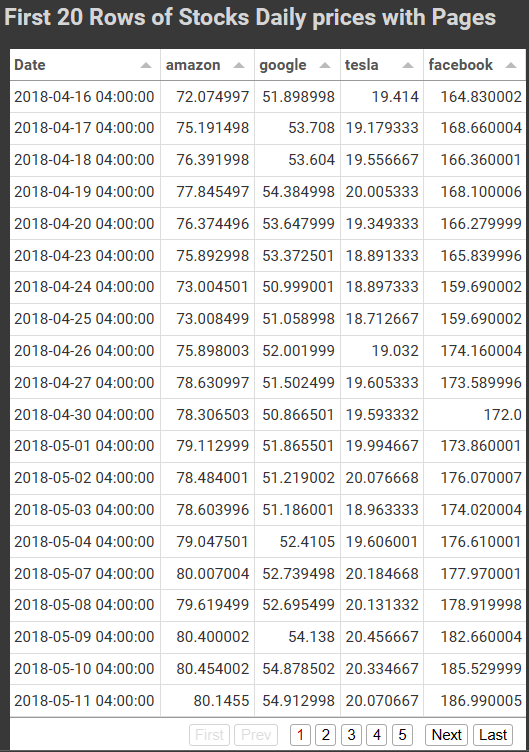

In [ ]:
stocks.shape

(1259, 4)

In [ ]:
stocks_stats=stocks.describe().transpose()
# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(stocks_stats.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## Summary Statistics of Daily Stock Prices', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=           count  ...)

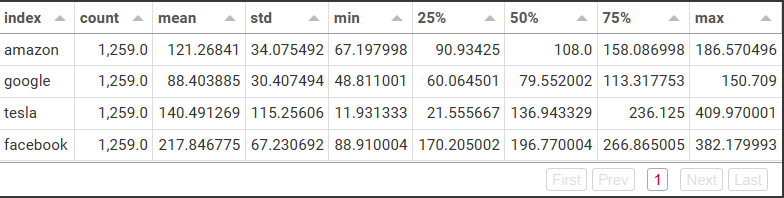

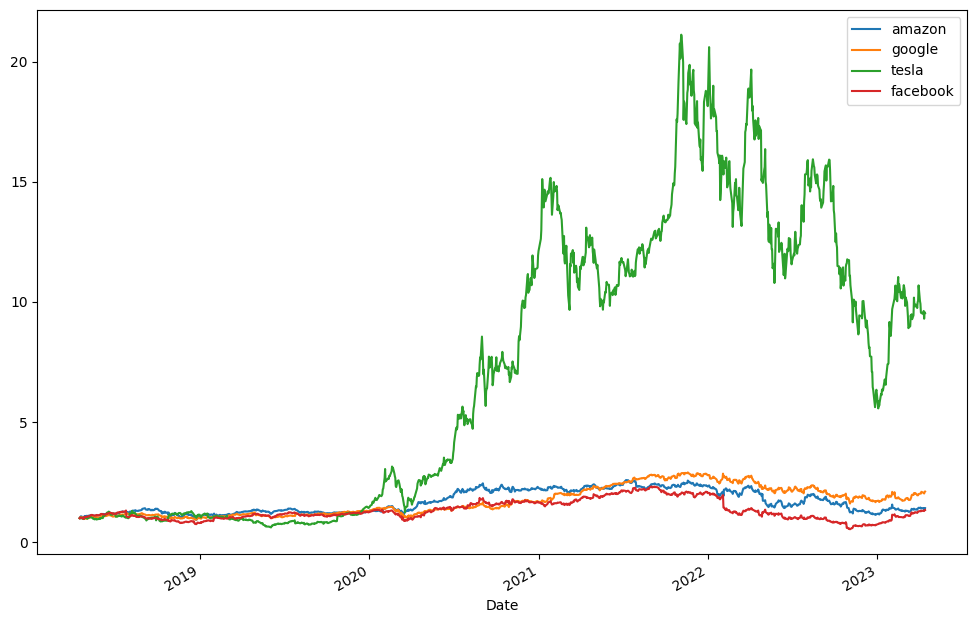

In [ ]:
import matplotlib.pyplot as plt

stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(12, 8))
plt.show()

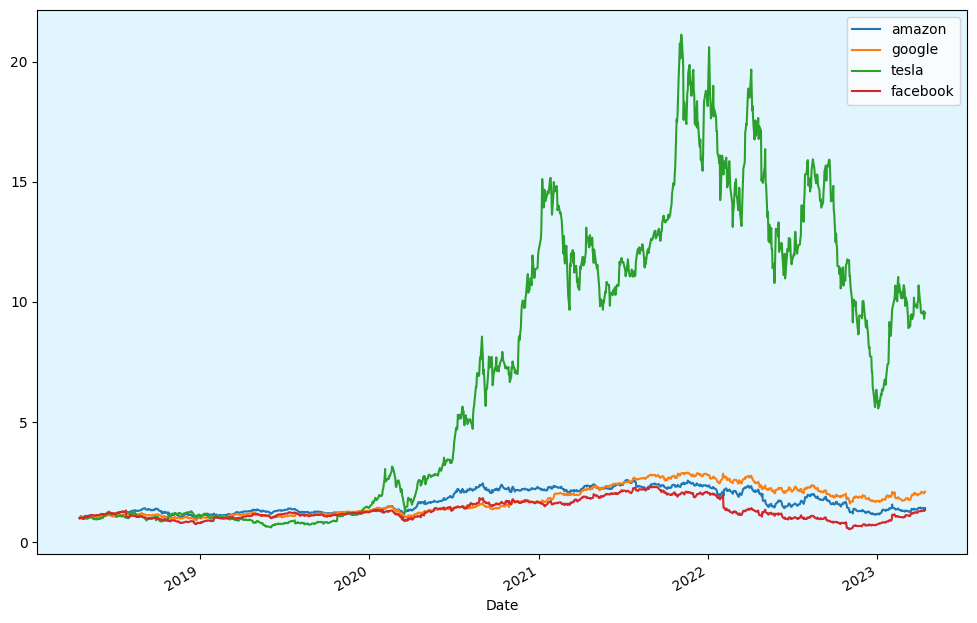

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
stock_normed = stocks/stocks.iloc[0]
fig, ax = plt.subplots(figsize=(12, 8))
stock_normed.plot(ax=ax)

# Set the background color
ax.set_facecolor('#e1f5fe')  # Replace with the color of your choice
# Choose any of these: 
'''
(Light brown: '#f2f2f2'
Light blue: '#e1f5fe'
Light green: '#e8f5e9'
Light pink: '#fce4ec'
Light yellow: '#fff9c4'
Light gray: '#f5f5f5')'''

# Show the plot
plt.show()


In [ ]:
stock_daily_ret = stocks.pct_change(1)
#stock_daily_ret.tail()
# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(stock_daily_ret.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## First 20 Rows of Stocks Daily Returns with Pages', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=              ...)

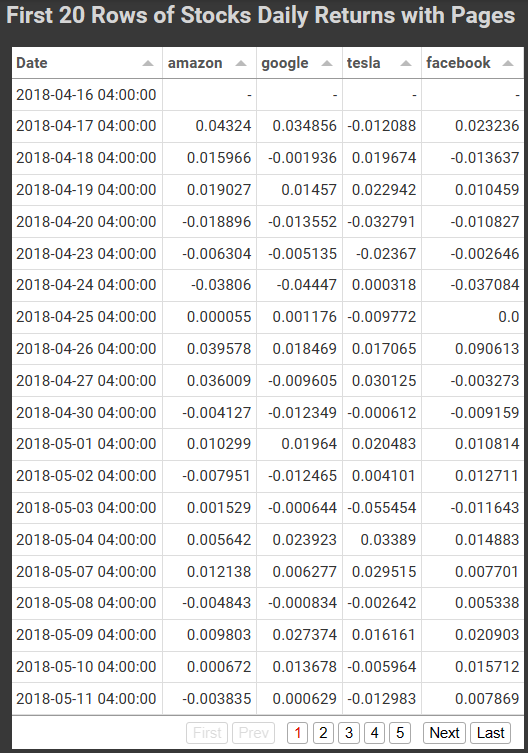

## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [ ]:
log_ret = np.log(stocks/stocks.shift(1))
#log_ret.tail()
# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(log_ret.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## First 20 Rows of Log Returns with Pages', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=              ...)

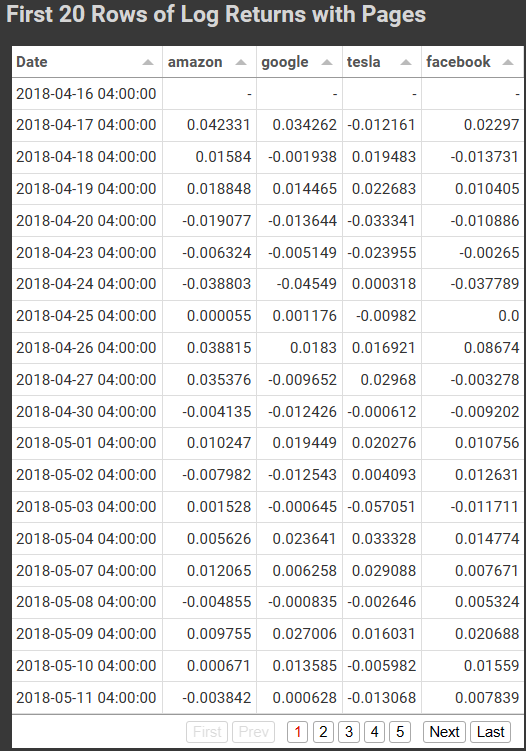

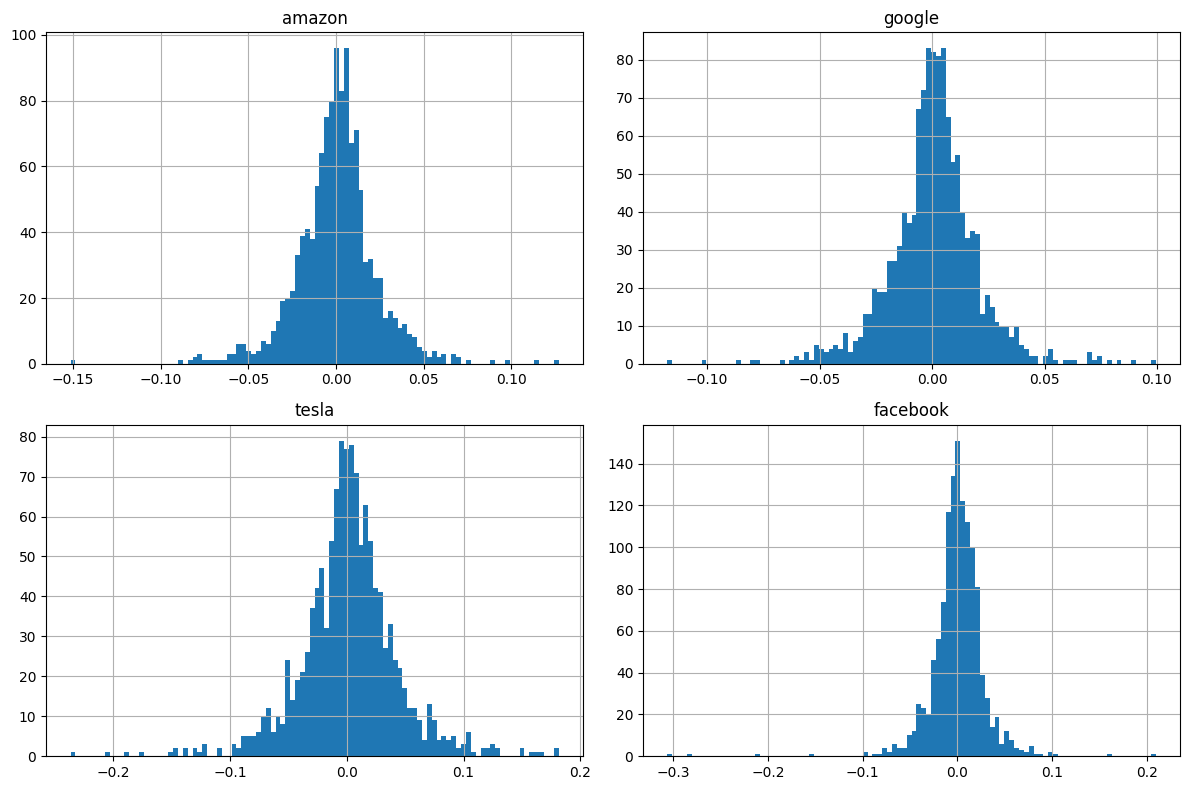

In [ ]:
log_ret.hist(bins=100,figsize=(12,8));
plt.tight_layout()

In [ ]:
stocks.columns

Index(['amazon', 'google', 'tesla', 'facebook'], dtype='object')

In [ ]:
import panel as pn
import pandas as pd
import hvplot.pandas

# Load your dataset into a DataFrame
#df = pd.read_csv('your_dataset.csv')

# Create a list of options for the drop-down menu
options = [ 'amazon', 'google', 'tesla', 'facebook']

# Create the drop-down menu widget
dropdown = pn.widgets.Select(name='Select Column:', options=options)

# Function to update the chart based on the selected value from the drop-down menu
@pn.depends(dropdown.param.value)
def update_chart(column):
    # Create a chart based on the selected column
    return stocks.hvplot.box(column, color="red")

# Create a Panel layout with the drop-down menu and chart
dashboard = pn.Column(dropdown, update_chart)

# Create a standalone server for the dashboard
dashboard.servable()

# Embed the dashboard in your notebook
#pn.panel(dashboard).embed()

Column
    [0] Select(options=['amazon', 'google', ...], value='amazon')
    [1] ParamFunction(function, _pane=HoloViews)

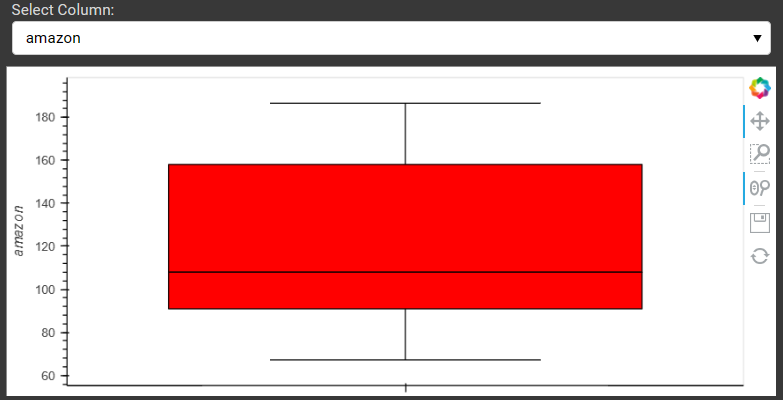

In [ ]:
log_trans=log_ret.describe().transpose()
# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(log_trans.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## Summary Statistics of Log Returns', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=           count  ...)

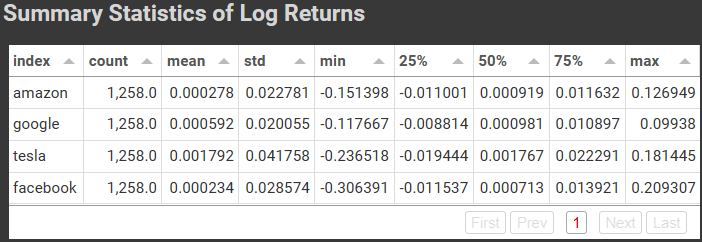

In [ ]:
log_ret.mean() * 252

amazon     0.07
google     0.15
tesla      0.45
facebook   0.06
dtype: float64

In [ ]:
# Compute pairwise covariance of columns
cov_ret=log_ret.cov()

# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(cov_ret.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## Pairwise Covariance Matrix', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=          amazon  ...)

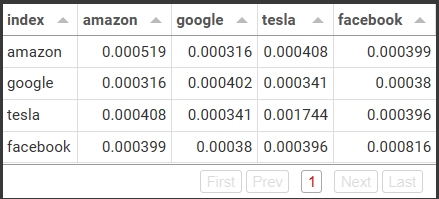

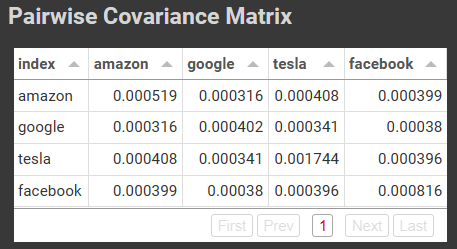

In [ ]:
cov_days=log_ret.cov()*252 # multiply by trading days

# Create a Tabulator widget with pagination
table = pn.widgets.Tabulator(cov_days.head(5000), pagination='remote')

# Display the widget in a Panel
panel = pn.Column('## Cov Log Returns by Number of Trading Days', table)
panel.servable()

Column
    [0] Markdown(str)
    [1] Tabulator(pagination='remote', value=          amazon  ...)

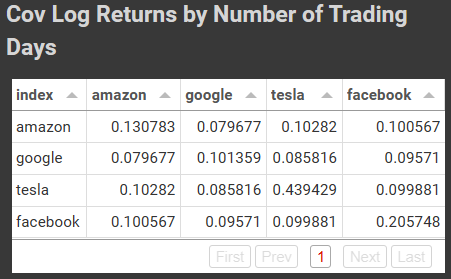

## Single Run for Some Random Allocation

In [ ]:
# Set seed (optional)
np.random.seed(1001)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *253
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['amazon', 'google', 'tesla', 'facebook'], dtype='object')


Creating Random Weights
[0.30623218 0.26506357 0.19606006 0.43052148]


Rebalance to sum to 1.0
[0.2556457  0.22127773 0.16367291 0.35940366]


Expected Portfolio Return
0.14661848520867918


Expected Volatility
0.34806313694981506


Sharpe Ratio
0.421241061301528


Great! Now we can just run this many times over!

In [ ]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [ ]:
# Maximum Sharpe Ratio
sharpe_arr.max()

0.7084260198885486

In [ ]:
sharpe_arr.argmax()

10035

In [ ]:
all_weights[10035,:]

array([0.01360898, 0.46934136, 0.51070502, 0.00634464])

In [ ]:
max_sr_ret = ret_arr[10035]
max_sr_vol = vol_arr[10035]

## Plotting the data

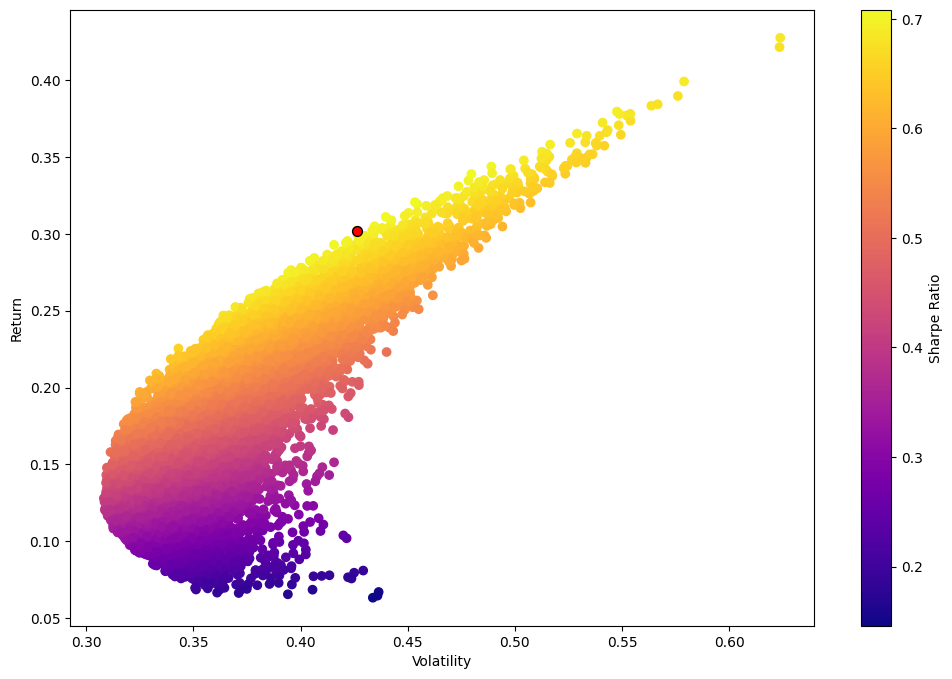

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [ ]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [ ]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [ ]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [ ]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [ ]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [ ]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [ ]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [ ]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [ ]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.7129581107605699
       x: [ 2.468e-17  4.489e-01  5.511e-01  3.541e-17]
     nit: 5
     jac: [ 1.779e-01  5.043e-04 -4.129e-04  2.237e-01]
    nfev: 26
    njev: 5

In [ ]:
opt_results.x

array([2.46803099e-17, 4.48851372e-01, 5.51148628e-01, 3.54108234e-17])

In [ ]:
get_ret_vol_sr(opt_results.x)

array([0.31593171, 0.44312801, 0.71295811])

# All Optimal Portfolios (Efficient Frontier)

In [ ]:
# Our returns go from 0 to somewhere along 0.9
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.9,100) # Change 100 to a lower number for slower computers!

In [ ]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [ ]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

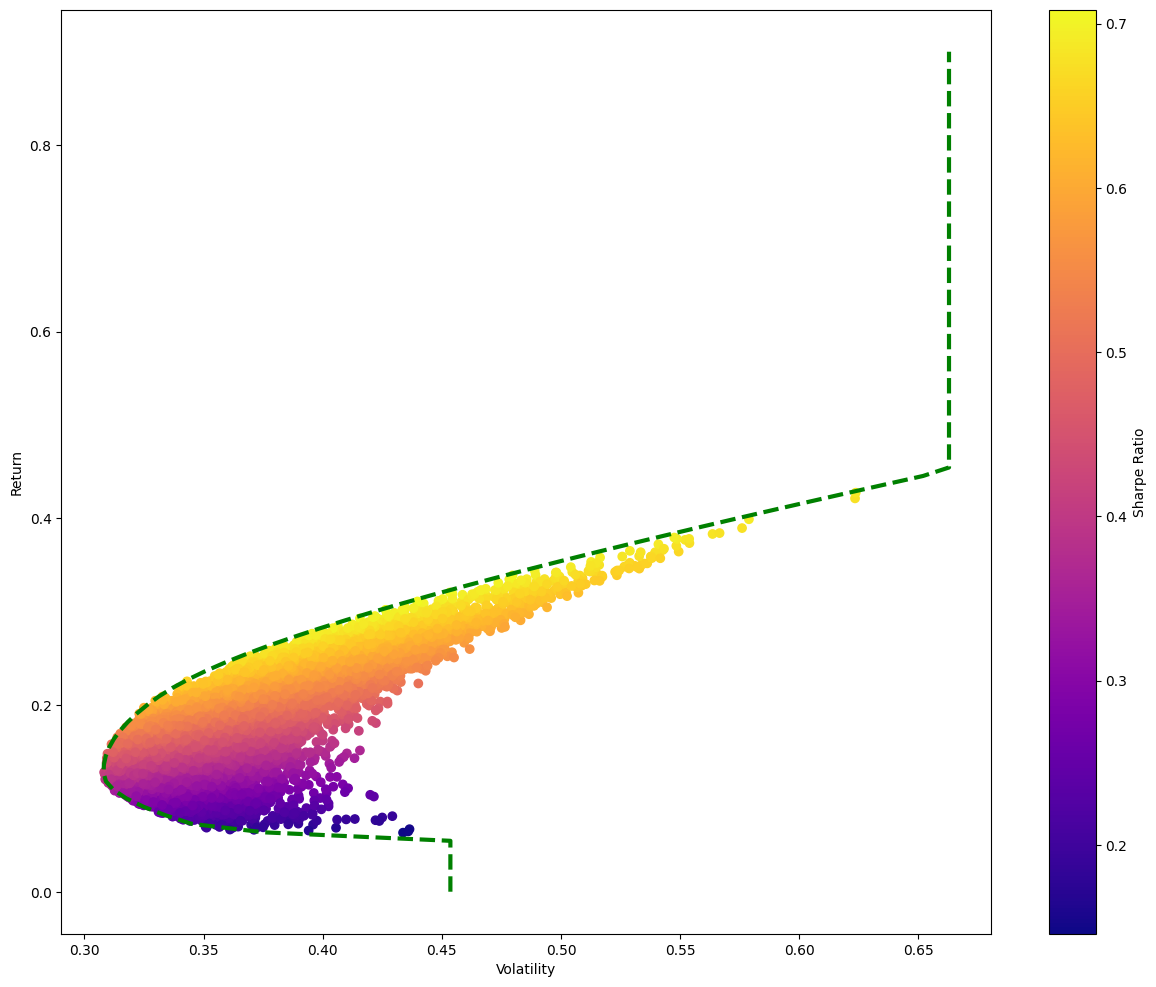

In [ ]:
plt.figure(figsize=(15,12))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);

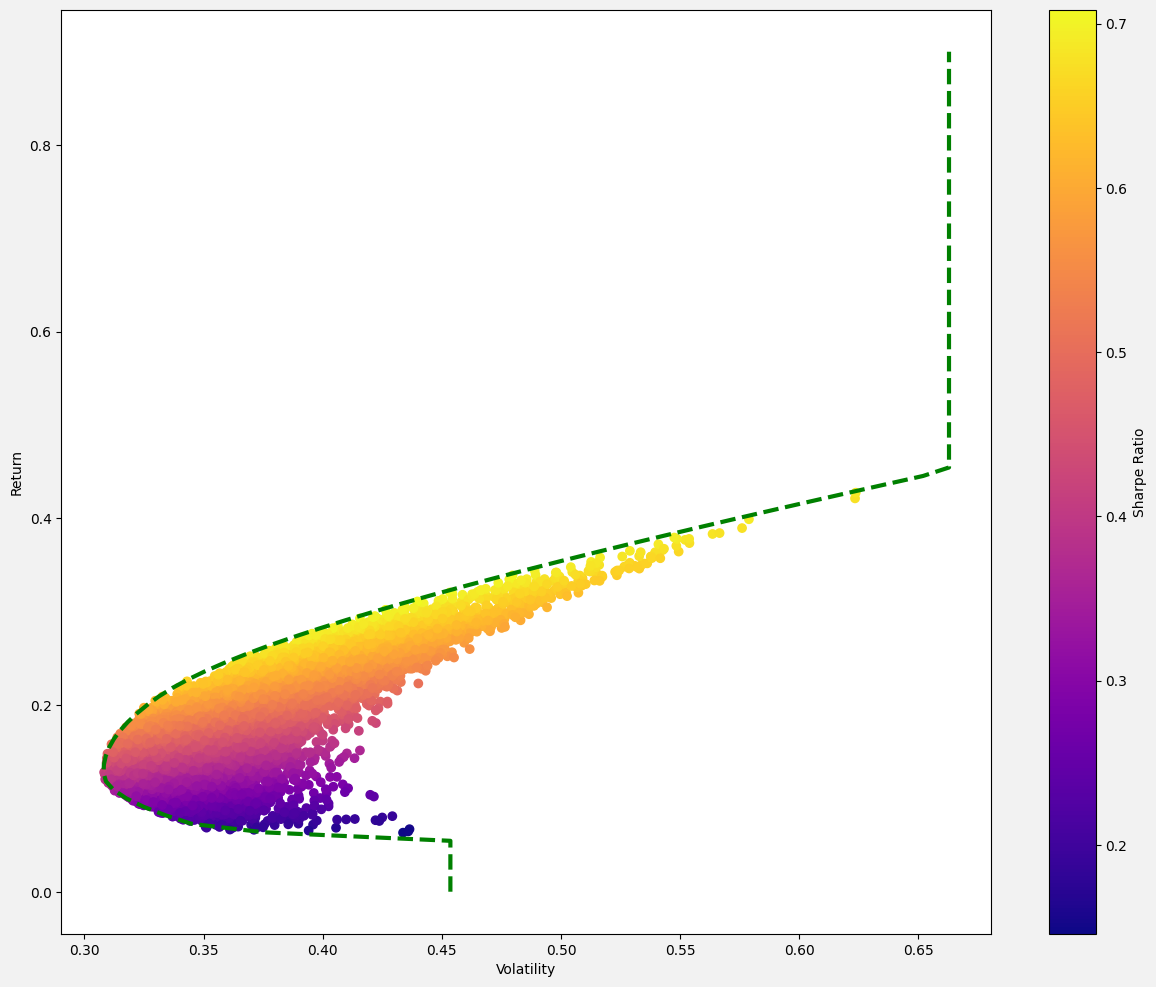

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
fig = plt.figure(figsize=(15,12))
fig.set_facecolor('#f2f2f2')  # Set the background color

plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Show the plot
plt.show()


# Valuation and Stock Statistics

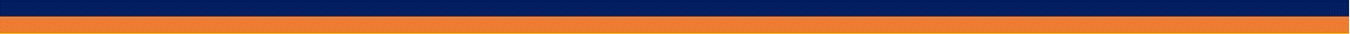

## Amazon Stock Valuations

In [ ]:
amzn_val=si.get_stats_valuation("AMZN")
amzn_val

Unnamed: 0 As of Date: 4/12/2023Current 12/31/2022   
0      Market Cap (intraday)                        1.02T    856.94B  \
1           Enterprise Value                        1.09T    926.53B   
2               Trailing P/E                          NaN      76.33   
3                Forward P/E                        58.82      41.32   
4  PEG Ratio (5 yr expected)                         2.12       4.67   
5          Price/Sales (ttm)                         1.98       1.71   
6           Price/Book (mrq)                         7.01       6.26   
7   Enterprise Value/Revenue                         2.13       6.21   
8    Enterprise Value/EBITDA                        28.53      74.62   

  9/30/2022 6/30/2022 3/31/2022  
0     1.15T     1.08T     1.66T  
1     1.22T     1.13T     1.68T  
2    101.76     51.23     50.30  
3     46.95     64.10     57.14  
4      4.50      4.01      2.96  
5      2.38      2.29      3.57  
6      8.77      8.07     12.00  
7      9.57      9.31     14.42  
8     88.36    149.96    401.35

image.png

### Amazon Analyst Stock Information

In [ ]:
amzn_statistics=si.get_analysts_info("AMZN")
amzn_statistics

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Mar 2023)  Next Qtr. (Jun 2023)   
 0   No. of Analysts                    36.00                 33.00  \
 1     Avg. Estimate                     0.22                  0.33   
 2      Low Estimate                    -0.03                 -0.08   
 3     High Estimate                     0.65                  0.90   
 4      Year Ago EPS                    -0.38                 -0.20   
 
    Current Year (2023)  Next Year (2024)  
 0                44.00             42.00  
 1                 1.42              2.51  
 2                 0.18              1.26  
 3                 1.94              3.54  
 4                -0.27              1.42  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Mar 2023) Next Qtr. (Jun 2023)   
 0          No. of Analysts                      38                   36  \
 1            Avg. Estimate                 124.47B              129.98B   
 2             Low Estimate           

image.png

In [ ]:
!pip install --upgrade si
!pip install si

### Amazon Balance Sheet

In [ ]:
from yahoo_fin.stock_info import get_balance_sheet
# Get the balance sheet data for Apple
amzn_balance_sheet =si.get_balance_sheet("AMZN")

# Print the first 5 rows of the DataFrame
amzn_balance_sheet


Empty DataFrame
Columns: []
Index: []

image.png

### Amazon Income Statement

In [ ]:
from yahoo_fin.stock_info import get_income_statement
# Get the balance sheet data for Apple
amzn_income= si.get_income_statement("AMZN")

# Print the first 5 rows of the DataFrame
amzn_income


image.png

## Amazon Cash Flow Statement

In [ ]:
from yahoo_fin.stock_info import get_cash_flow
# Get the balance sheet data for Apple
amzn_cashflow= si.get_cash_flow("AMZN")

# Print the first 5 rows of the DataFrame
amzn_cashflow


image.png

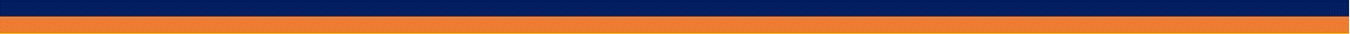